In [11]:
from scipy.stats import cauchy
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import seaborn as sns
np.set_printoptions(precision=2)
sns.set_theme(style = 'darkgrid')
import math
import pandas as pd

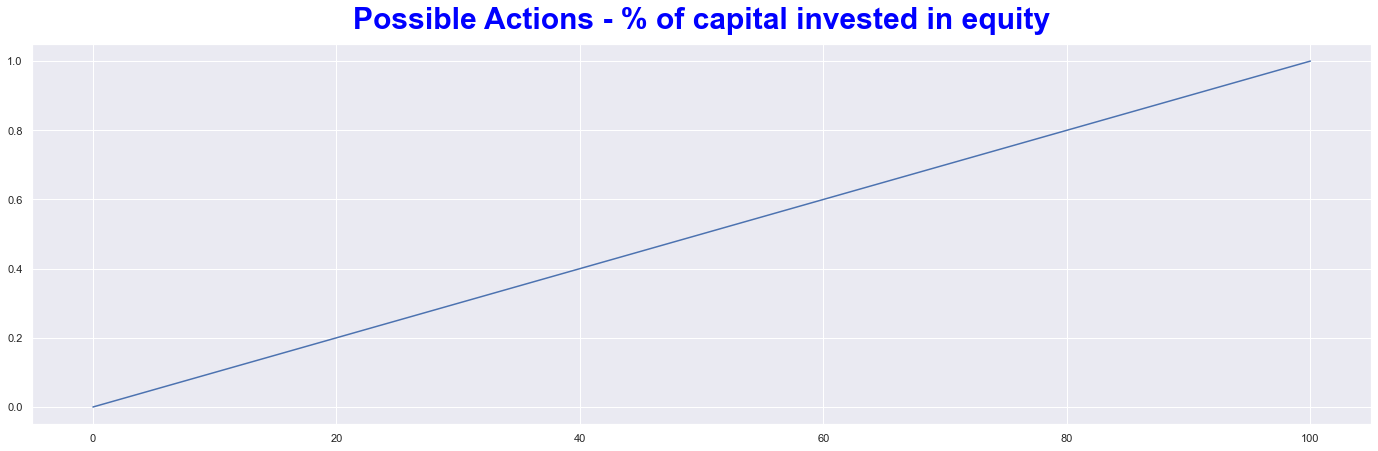

In [2]:
plt.figure(figsize = (24,7))
actions = np.arange(0,101)/100
sns.lineplot(x=np.arange(101),y=actions)
plt.title(label='Possible Actions - % of capital invested in equity', fontdict = {'fontsize':30, 'fontweight':600, 'color':'blue'}, pad=15.0)
plt.show()

In [3]:
time_delta = 1
Goal = 100
baseline = 80
fi_ret = 0.05
eq_ret = 0.12
eq_std = 0.2
optimal_action = np.zeros(100)

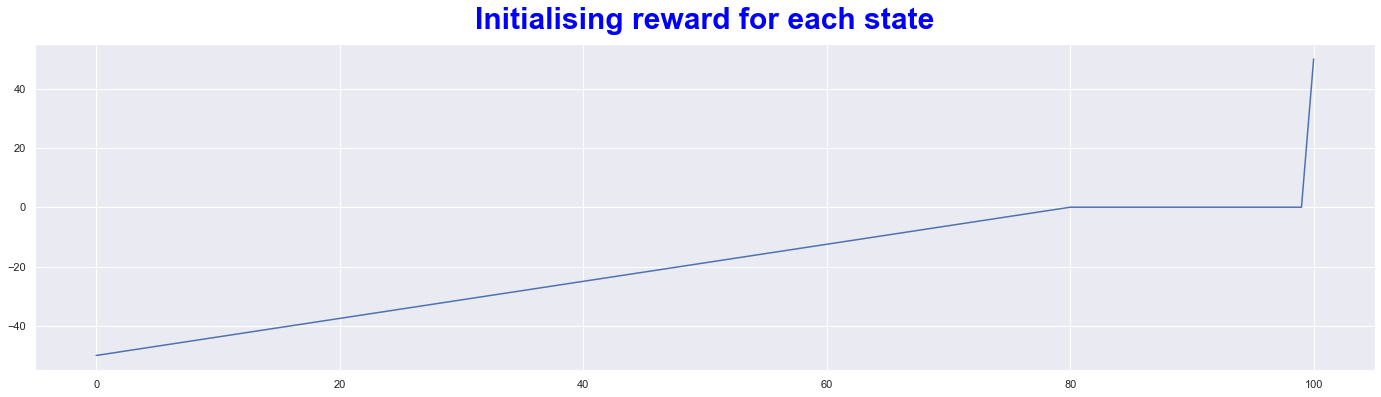

In [4]:
state_val = np.zeros(Goal + 1)
state_val[Goal] = +50
state_val[0] = -50
baseline = 80
for a in range(1, baseline+1):
    state_val[a] = state_val[a-1] - state_val[0]/baseline
plt.figure(figsize = (24,6))
sns.lineplot(x = np.arange(101), y = state_val)
plt.title('Initialising reward for each state', fontdict = {'fontsize':30, 'fontweight':600, 'color':'blue'}, pad=15.0)
plt.show()

  0%|          | 0/15 [00:00<?, ?it/s]

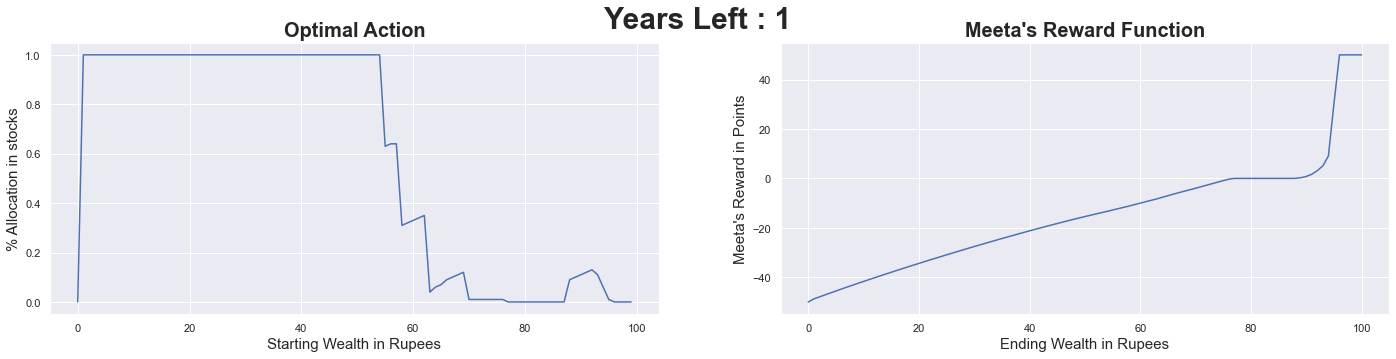

  7%|▋         | 1/15 [02:41<37:34, 161.03s/it]

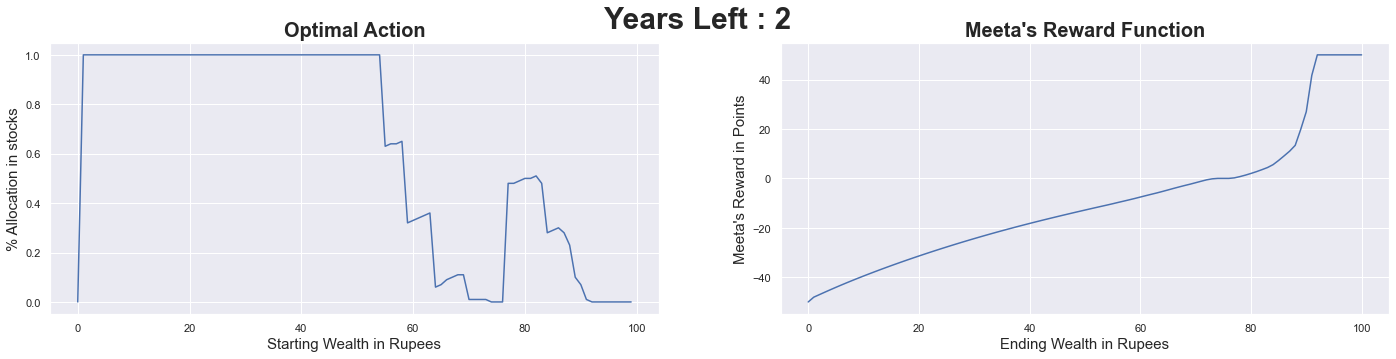

 13%|█▎        | 2/15 [05:15<34:27, 159.02s/it]

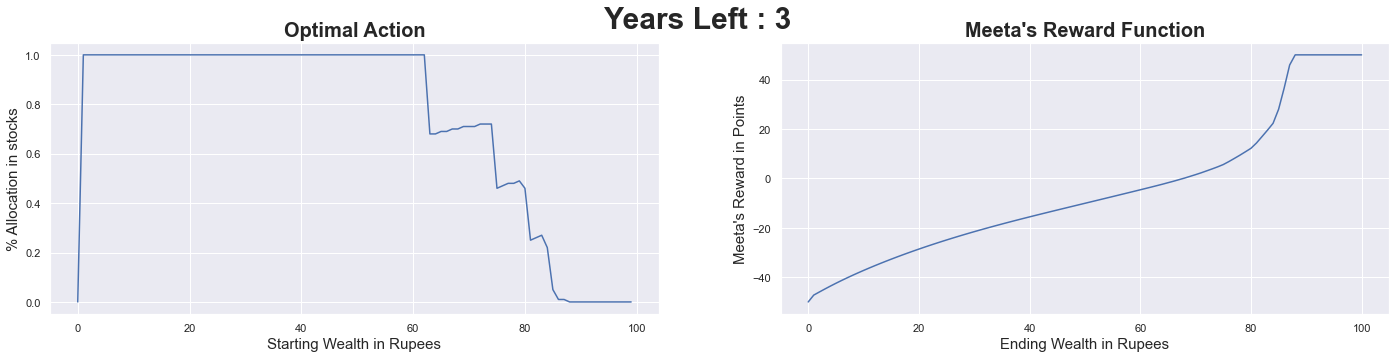

 20%|██        | 3/15 [07:44<31:14, 156.18s/it]

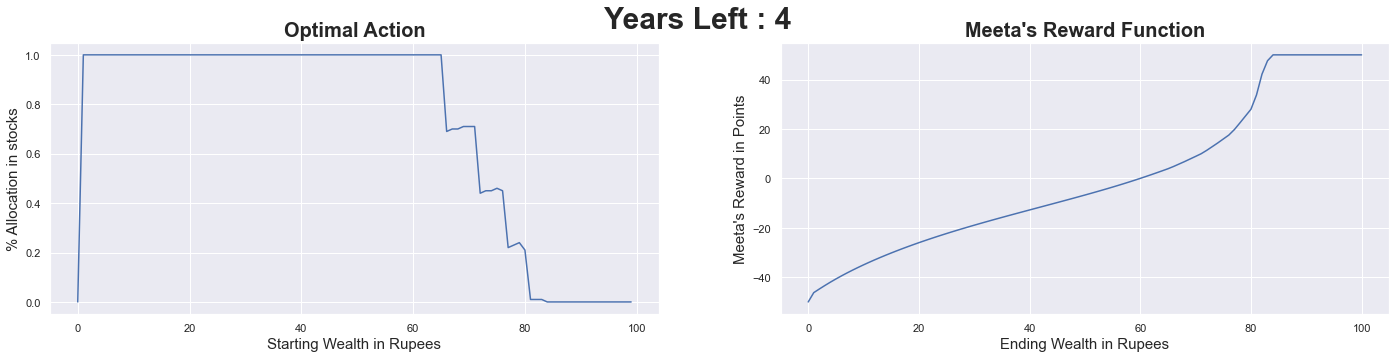

 27%|██▋       | 4/15 [10:07<27:51, 151.98s/it]

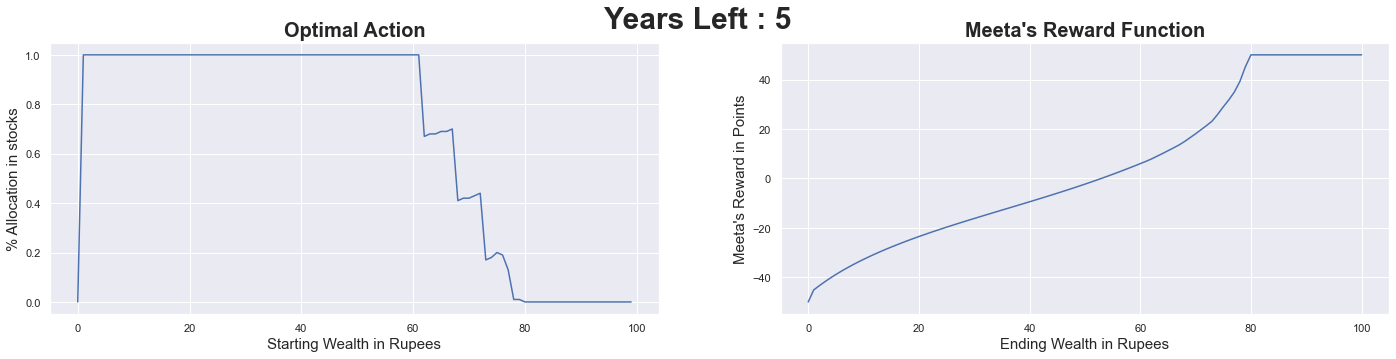

 33%|███▎      | 5/15 [12:23<24:33, 147.31s/it]

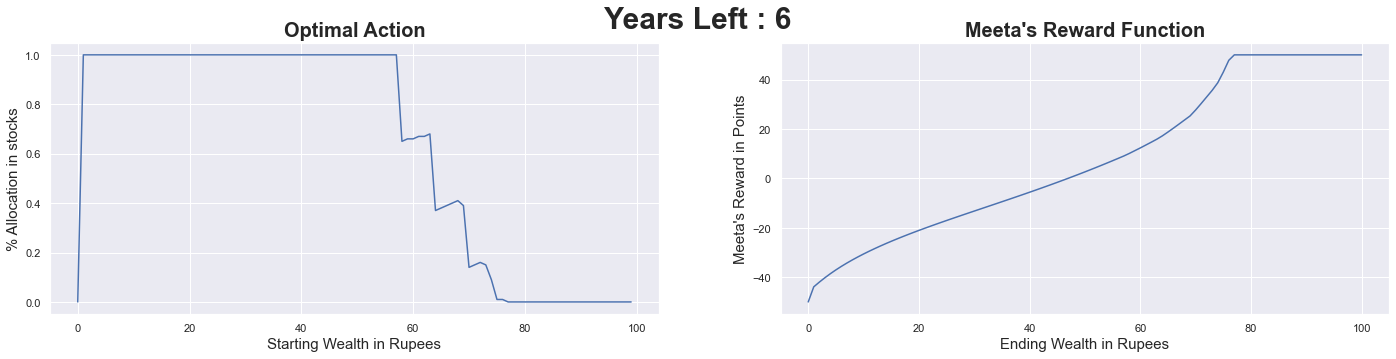

 40%|████      | 6/15 [14:32<21:15, 141.69s/it]

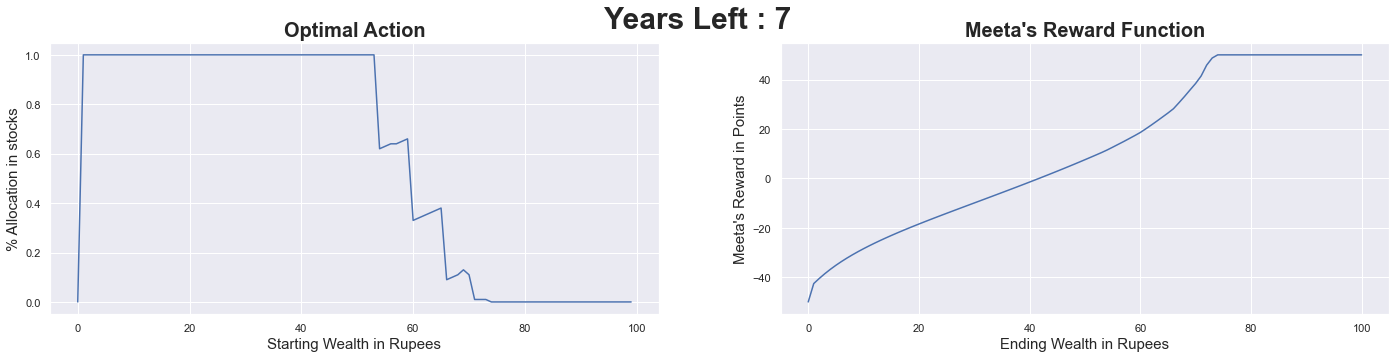

 47%|████▋     | 7/15 [16:35<18:09, 136.22s/it]

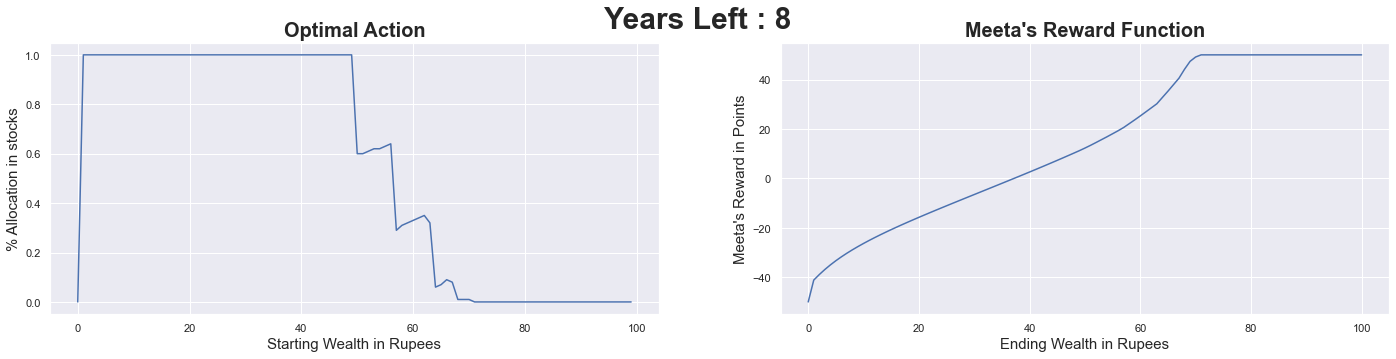

 53%|█████▎    | 8/15 [18:31<15:11, 130.21s/it]

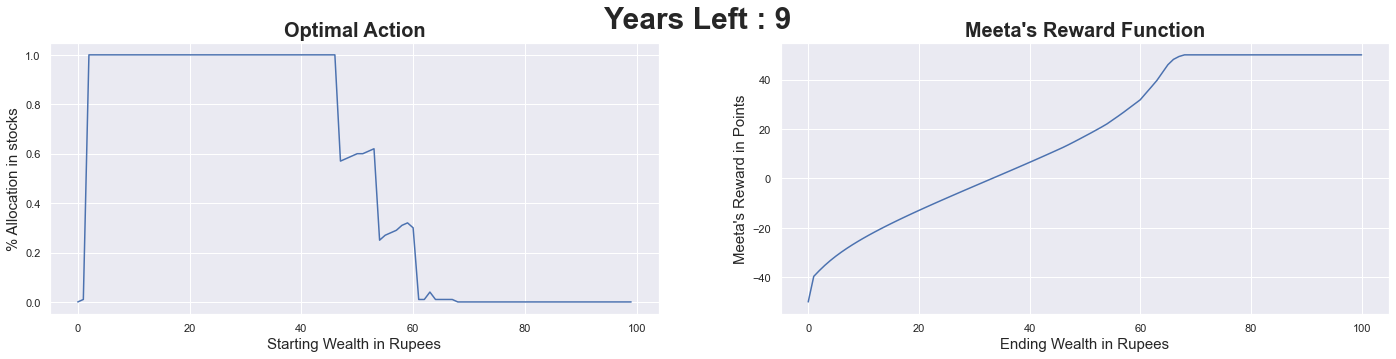

 60%|██████    | 9/15 [20:22<12:25, 124.25s/it]

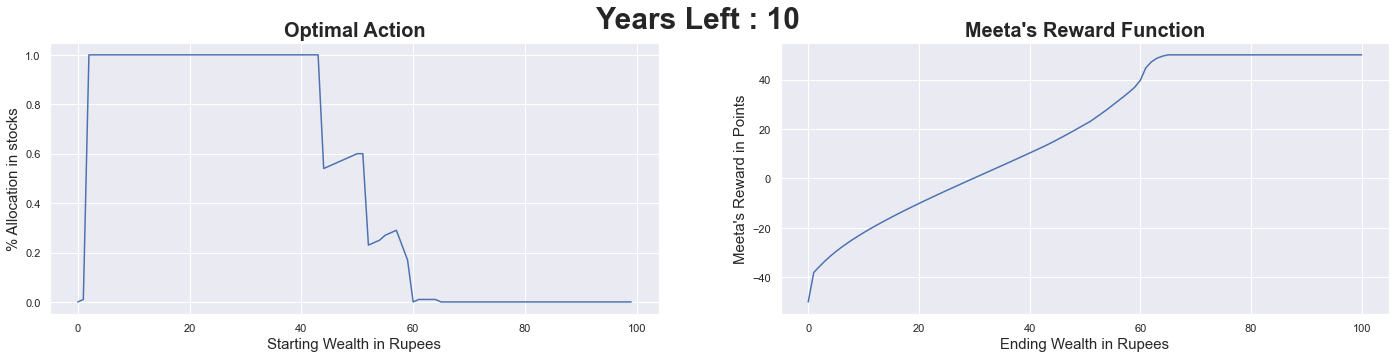

 67%|██████▋   | 10/15 [22:11<09:58, 119.67s/it]

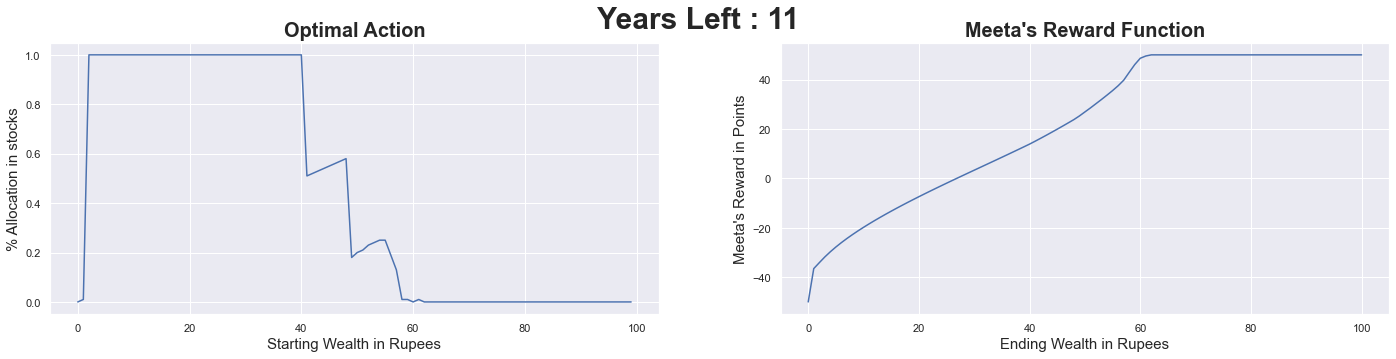

 73%|███████▎  | 11/15 [23:52<07:36, 114.16s/it]

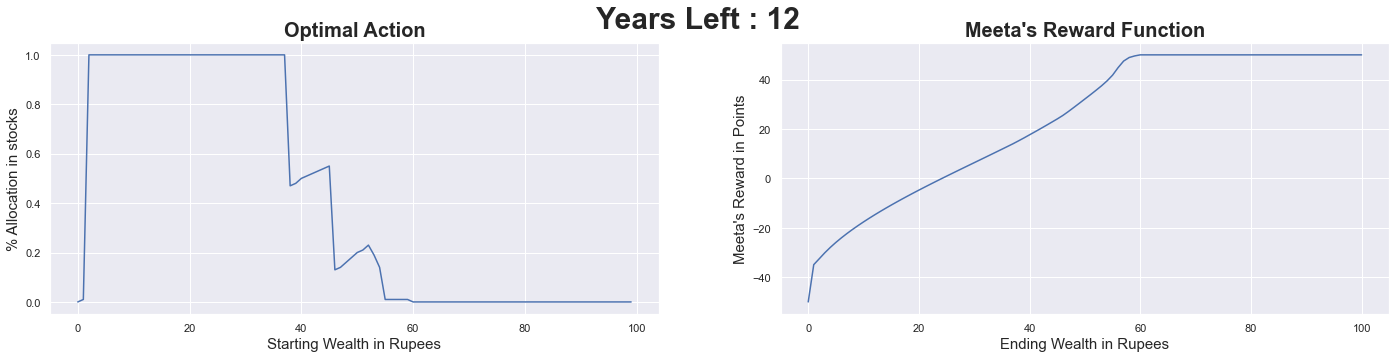

 80%|████████  | 12/15 [25:31<05:29, 109.71s/it]

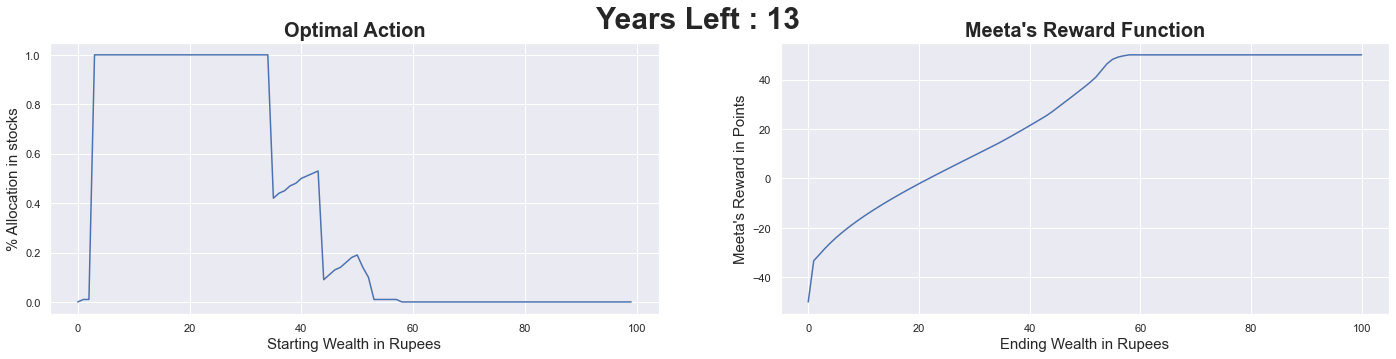

 87%|████████▋ | 13/15 [27:07<03:31, 105.52s/it]

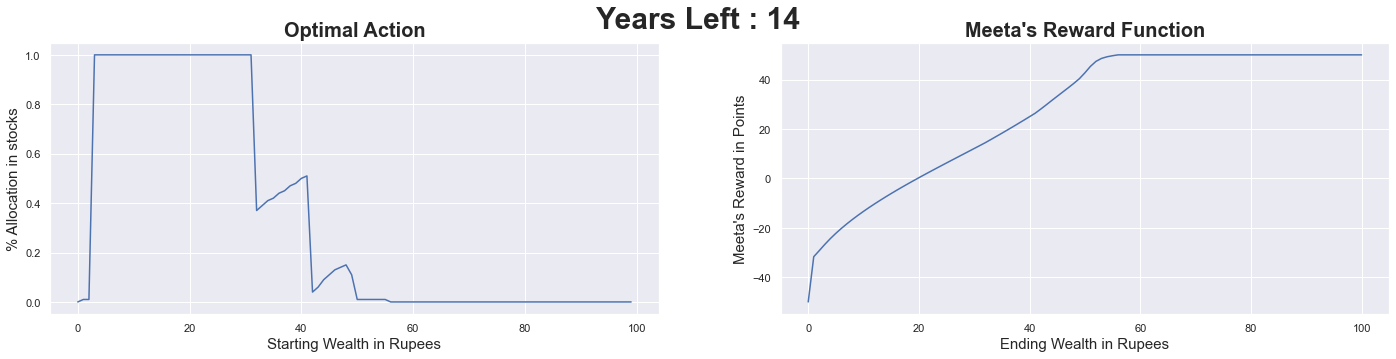

 93%|█████████▎| 14/15 [28:39<01:41, 101.54s/it]

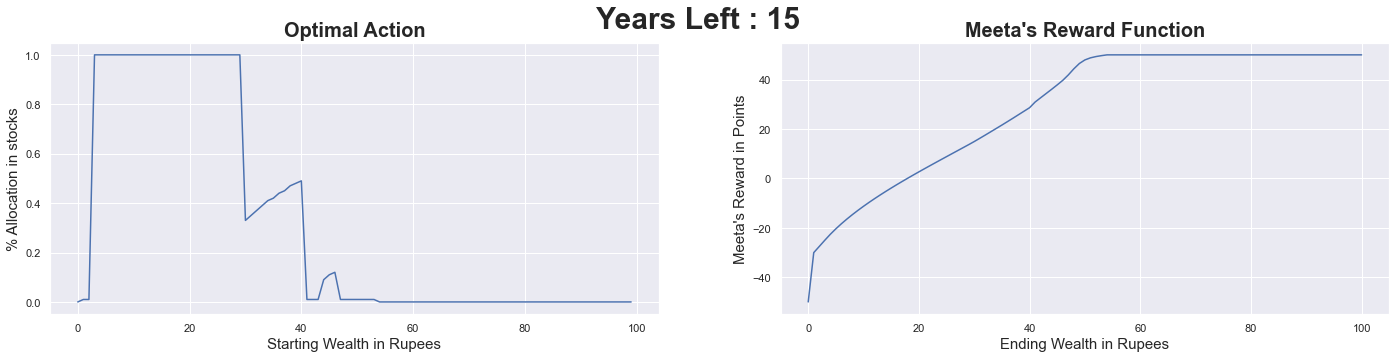

100%|██████████| 15/15 [30:10<00:00, 120.69s/it]


In [5]:
Goal_yearend = Goal
for years_left in trange(1,16):
    Goal_yearbegin = math.ceil(Goal_yearend / (1 + fi_ret))

    for cur_c in range(1,100):
        q = []
        gap_to_target = max(0, Goal_yearend - cur_c)
        
        if(cur_c * fi_ret > gap_to_target):
            state_val[cur_c] = state_val[Goal_yearend]
            optimal_action[cur_c] = 0.0
            continue
            
        for eq_perc in actions:
            fi_perc = 1 - (eq_perc)
            fi_cash_ret = math.floor(fi_perc * cur_c * fi_ret)
            q_val = 0
            for next_c in range(0,101):
#                 Equity return required to achieve the next state or the goal
                eq_cash_ret_req = next_c - cur_c - fi_cash_ret
                eq_ret_req = eq_cash_ret_req/((eq_perc + 1e-9)*cur_c)
#         Equity return required to achieve the next state - 1
                eq_cash_ret_req_minus_1 = next_c - 1 - cur_c - fi_cash_ret
                eq_ret_req_minus_1 = eq_cash_ret_req_minus_1/((eq_perc + 1e-9)*cur_c)
        
                if(eq_perc == 0):
                    if(eq_ret_req == 0):
                        prob = 1
                    else:
                        prob = 0
                else:
                    if(next_c == 0):
                        prob = cauchy.cdf(eq_ret_req, eq_ret, eq_std)
                    else:
                        prob = cauchy.cdf(eq_ret_req, eq_ret, eq_std) - cauchy.cdf(eq_ret_req_minus_1, eq_ret, eq_std)
                    
                q_val += prob * state_val[next_c]

            q.append(q_val)
        state_val[cur_c] = max(q)
        optimal_action[cur_c] = actions[np.argmax(q)]
    fig, axes = plt.subplots(1, 2, figsize = (24,5))
    fig.suptitle(str('Years Left : ' + str(years_left)), size=30, fontweight=650)

    sns.lineplot(ax = axes[0], x = np.arange(0,100), y = optimal_action, markers = True, legend = True)
    axes[0].set_title('Optimal Action', size=20, fontweight=900)
    axes[0].set_xlabel('Starting Wealth in Rupees', size=15)
    axes[0].set_ylabel('% Allocation in stocks', size=15)

    sns.lineplot(ax = axes[1], x = np.arange(0,101), y = state_val, markers = True, legend = True)
    axes[1].set_title("Meeta's Reward Function", size=20, fontweight=900)
    axes[1].set_xlabel('Ending Wealth in Rupees', size = 15)
    axes[1].set_ylabel("Meeta's Reward in Points", size=15)

    plt.show()
    Goal_yearend = Goal_yearbegin

In [8]:
state_val

array([-50.  , -30.03, -27.54, -25.02, -22.61, -20.39, -18.35, -16.43,
       -14.63, -12.91, -11.27,  -9.7 ,  -8.18,  -6.72,  -5.29,  -3.9 ,
        -2.54,  -1.21,   0.1 ,   1.38,   2.65,   3.9 ,   5.14,   6.37,
         7.59,   8.81,  10.03,  11.24,  12.45,  13.67,  14.91,  16.22,
        17.55,  18.89,  20.24,  21.59,  22.97,  24.36,  25.78,  27.2 ,
        28.61,  30.9 ,  32.64,  34.36,  36.08,  37.85,  39.69,  41.88,
        44.35,  46.51,  47.95,  48.79,  49.31,  49.68,  50.  ,  50.  ,
        50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,
        50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,
        50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,
        50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,
        50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,  50.  ,
        50.  ,  50.  ,  50.  ,  50.  ,  50.  ])

In [9]:
optimal_action

array([0.  , 0.01, 0.01, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.33, 0.35, 0.37,
       0.39, 0.41, 0.42, 0.44, 0.45, 0.47, 0.48, 0.49, 0.01, 0.01, 0.01,
       0.09, 0.11, 0.12, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

In [21]:
pd.set_option('display.max_rows', 101)
pd.DataFrame(optimal_action).head(60)

,0
0,0.00
1,0.01
2,0.01
3,1.00
4,1.00
5,1.00
6,1.00
7,1.00
8,1.00
9,1.00
